# RandomForestClassifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)




# Feature importance


In [3]:
importances = rf.feature_importances_
importances_image = importances.reshape(28, 28)

# Visualize the feature importance as an image


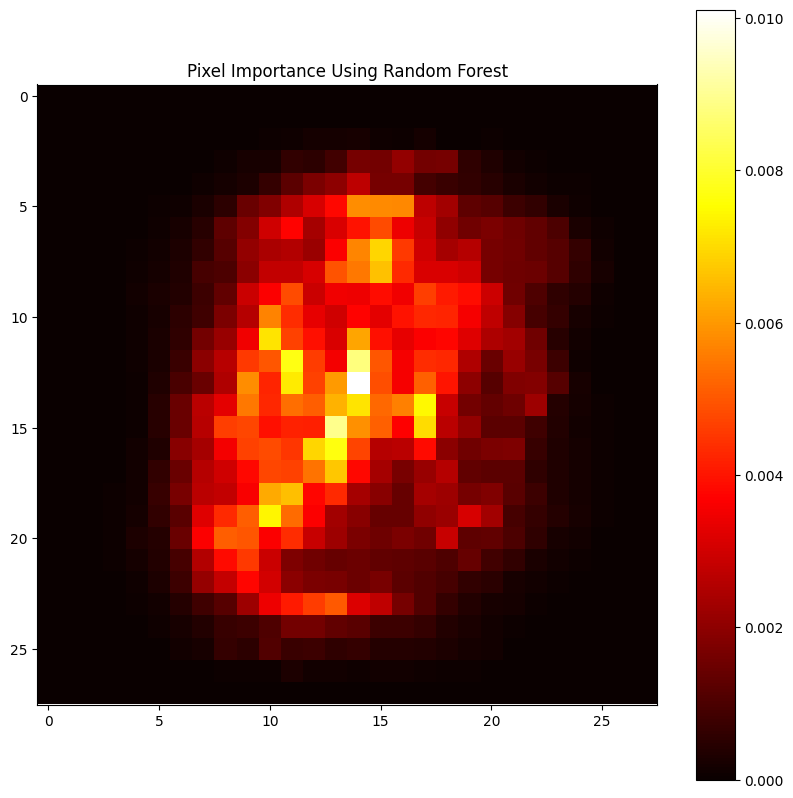

In [2]:
plt.figure(figsize=(10, 10))
plt.imshow(importances_image, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Pixel Importance Using Random Forest')
plt.show()


## Bright Areas:
- High Importance: The brighter areas in the heatmap represent pixels that have a higher importance in the Random Forest model's decision-making process. These pixels, when varied, have a more significant impact on the model's predictions.
- Focus of Decision Trees: These areas are where the ensemble of decision trees in the Random Forest focuses most of their attention when making predictions. In the context of MNIST, these would typically be areas where there's a lot of variation across different digits, such as the center of the image where most of the writing is concentrated.

## Dark Areas

- Low Importance: Darker areas indicate pixels that have less influence on the model's predictions. Changes in these pixels do not significantly alter the outcome of the model's decision.
- Uniform Across Digits: These areas are usually consistent across different digits, such as the image edges, and do not carry distinguishing information that can help identify one digit from another.

## Interpretation Tips

- Central Pixels vs. Edge Pixels: For MNIST digits, central pixels are usually more important than edge pixels because the center is where the digits are written, and the edges often remain blank across images.
- Patterns and Shapes: High-importance pixels can reveal common patterns or shapes that the Random Forest model uses to differentiate between digits. For example, certain curves or lines unique to specific digits might emerge as areas of high importance.
- Improving Data Preprocessing: If some areas show unexpected importance, it might indicate that additional preprocessing could improve model performance. For example, removing noise or aligning images more accurately could make the model focus on truly relevant features.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the Boston housing dataset
boston = load_boston()
X = boston.data
y = boston.target
features = boston.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Feature importance
importances = rf_regressor.feature_importances_

# Plotting feature importance
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance in Boston Housing Dataset')
plt.ylabel('Importance')
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the Boston housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target
features = housing.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


# Feature importance


In [6]:
importances = rf_regressor.feature_importances_

# Plotting feature importance


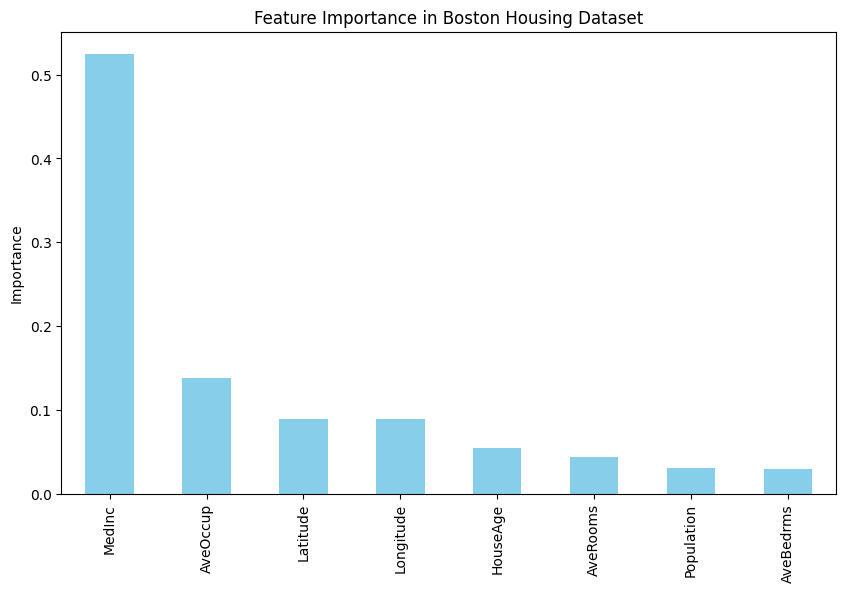

In [7]:
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance in Boston Housing Dataset')
plt.ylabel('Importance')
plt.show()

# Dimensionality Reduction


## PCA

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


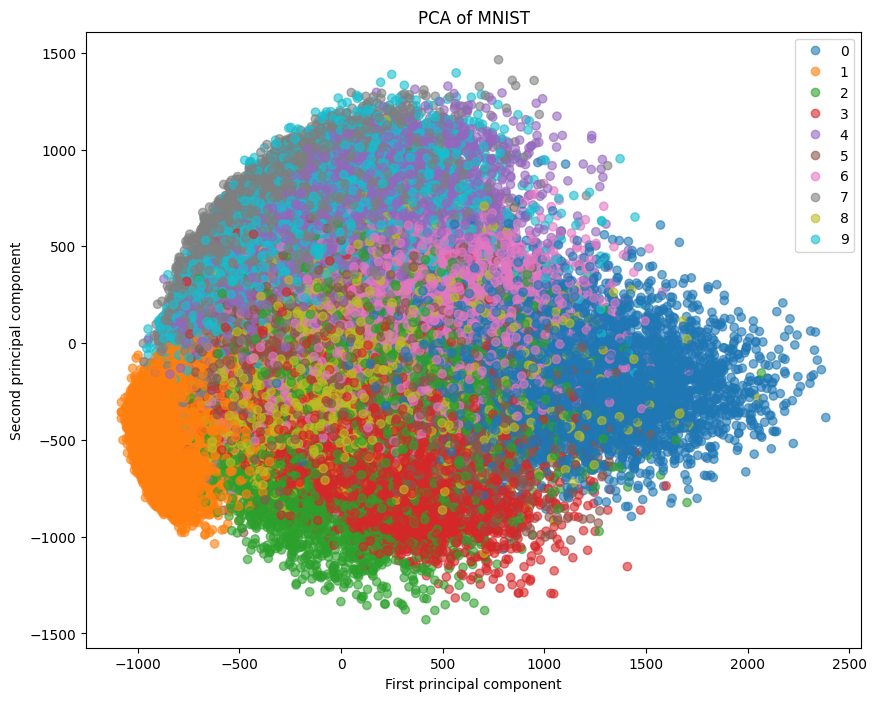

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

# PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))
plt.title('PCA of MNIST')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


## T-SNE

In [ ]:
# prompt: give me a t-sne code for mnsit

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load MNIST data
# mnist = fetch_openml('mnist_784', version=1)
# X, y = mnist['data'], mnist['target'].astype(int)

# Reduce dimensionality to 2 with TSNE
tsne = TSNE(n_components=2, learning_rate='auto',
           init='random', perplexity=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))
plt.title('t-SNE of MNIST')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


In [10]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

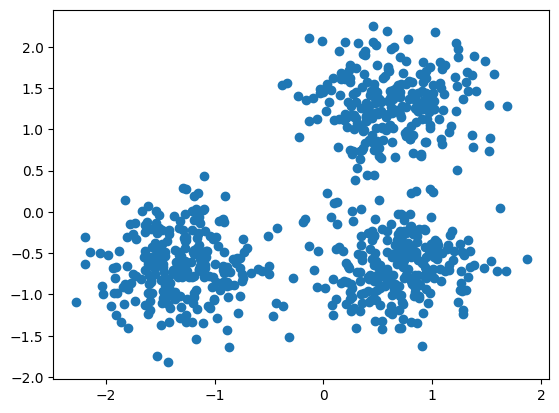

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [12]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [13]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


Homogeneity

    Explanation: A clustering result satisfies homogeneity if all of its clusters contain only data points that are members of a single class.
    Example: If we have two clusters, and each cluster contains elements from only one class (but both clusters belong to different classes), then our clustering is perfectly homogeneous.

Completeness

    Explanation: A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
    Example: If we have a dataset with two classes, and all elements of each class are grouped into a single cluster (two clusters in total, each for one class), then our clustering satisfies completeness.

V-measure

    Explanation: The V-measure is the harmonic mean between homogeneity and completeness. It is a balanced measure that takes into account both how uniformly clusters are composed of a single class and how completely members of a given class are grouped into the same cluster.
    Example: If our clustering achieves perfect homogeneity and completeness, the V-measure would be 1 (or 100%).

Rand Index (RI)

    Explanation: The Rand Index computes the similarity between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
    Example: If we have a perfectly matched clustering to the true labels (every pair of points that should be in the same cluster is, and every pair of points that should not be in the same cluster isn't), the Rand Index would be 1.

Adjusted Rand Index (ARI)

    Explanation: The Adjusted Rand Index is the corrected-for-chance version of the Rand Index. It adjusts for the fact that the RI score will increase with the number of clusters, regardless of the actual quality of the clustering. ARI has a range of [-1, 1], where 1 indicates perfect agreement between two clusterings.
    Example: An ARI of 0 indicates random labeling, independently of the number of clusters and samples. An ARI of 1 indicates that the clusterings are identical (up to a permutation).

Adjusted Mutual Information (AMI)

    Explanation: AMI is an adjustment of the Mutual Information (MI) score to account for chance. It measures the agreement of the two assignments, ignoring permutations, and with an adjustment for chance. It is normalized against a baseline of random clustering, and AMI has a value between 0 and 1, where 1 indicates perfect agreement.
    Example: If the clustering perfectly recovers the true labels, the AMI will be 1. If the clustering is randomly assigned regardless of the true labels, the AMI will be close to 0.

## SVM

In [14]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_clf.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [18]:
from sklearn.metrics import accuracy_score

# Predict the labels of the test set
y_pred = svm_clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


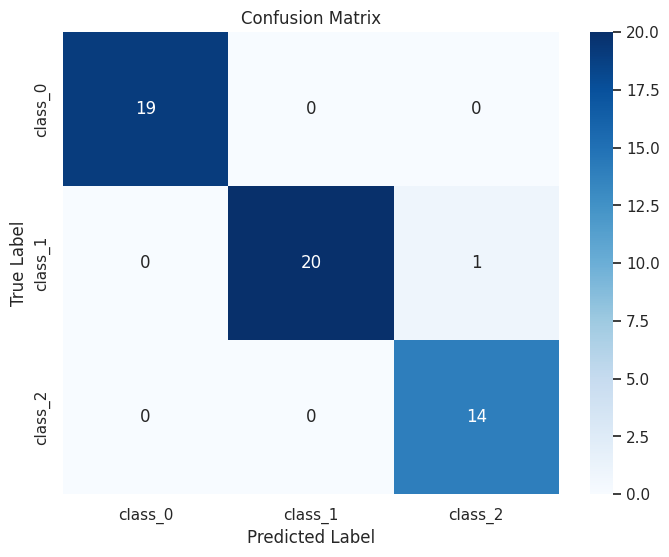

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


- Confusion Matrix: This matrix will show how each class was predicted. Ideally, you'd see high numbers down the diagonal (correct predictions), with few numbers off-diagonal (misclassifications).

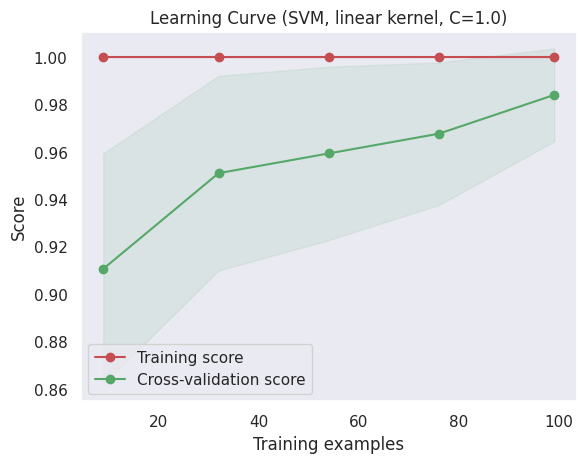

In [20]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(svm_clf, "Learning Curve (SVM, linear kernel, C=1.0)", X_train_scaled, y_train, cv=5, n_jobs=4)
plt.show()


- Learning Curves: These curves demonstrate the model's performance on the training and validation sets over various sizes of the training dataset. A gap between the training score and the cross-validation score indicates overfitting, whereas a low score for both training and validation indicates underfitting.

## SVR

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing

# Load the Boston housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y for scaling
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
from sklearn.svm import SVR

# Initialize the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Train the model
svr.fit(X_train_scaled, y_train_scaled)
from sklearn.metrics import mean_squared_error

# Predict the labels of the test set
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.33
